In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import imageio
from IPython.display import HTML


from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs,make_circles,make_moons,make_gaussian_quantiles

In [ ]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


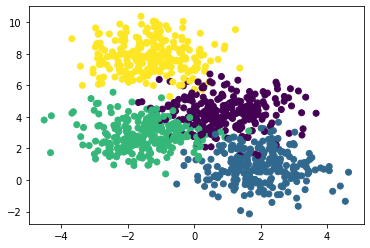

In [ ]:
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()
W1=np.random.random((2,2))
W2=np.random.random((2,4))

# Vectorised_class_neural_network **(2-layer network)** 

In [ ]:
class vec_multi_class:
  def __init__(self,W1,W2):
    self.W1=W1.copy() #(1,2)
    self.W2=W2.copy()  #(2,4)
    self.B1=np.zeros((1,2))
    self.B2=np.zeros((1,4))
  
  def softmax(self,x):
    x_e=np.exp(x)
    x_sof=x_e/np.sum(x_e)
    return x_sof

  def sigmoid(self,x):
    return 1/(1+np.exp(-x)) 

  def grad_sigmoid(self,x):
    self.feed_forward(x)
    return (x)*(1-x) 
  
  def feed_forward(self,x):
    #self.x=x.reshape(1,-1) #creates a single row of elements!
    self.a1=np.matmul(x,self.W1) + self.B1 #matmul is the original matrix multiplication!
    self.h1=self.sigmoid(self.a1)
    self.a2=np.matmul(self.h1,self.W2) + self.B2 #(1,4)
    self.h2=self.softmax(self.a2)
    
    return self.h2

  def grad(self,x,y):
    self.feed_forward(x)
    #self.x=x.reshape(1,-1) #(1,2)
    #self.y=y.reshape(1,-1) #(1,4)

    self.dA2= self.h2 - y #(1,4)

    self.dW2=np.matmul((self.h1).T,self.dA2) #(2,4)
    self.dB2=np.sum(self.dA2,axis=0).reshape(1,-1) #(1,4)

    self.dH1=np.matmul(self.dA2,(self.W2).T) #(1,2)
    self.dA1=np.multiply(self.h1,self.grad_sigmoid(self.h1)) #(1,2)

    self.dW1=np.matmul((x).T,self.dA1) #(2,2)
    self.dB1=np.sum(self.dA1,axis=0).reshape(1,-1) #(1,2)

  def fit(self,X,Y,epochs=1,lr=1,display_loss=True):

    if display_loss:
      loss=[]

    for i in tqdm_notebook(range(epochs),total=epochs,unit='epochs'):

      self.grad(X,Y)  #Here, we vectorised our code. Instead of going via all the traiing cases, we just used a vector of all examples as
                      #our code is writted performing in vectorised way. Above, all the dimensions are of form(N,p)

      m=X.shape[0]
      self.W1-=lr*(self.dW1/m)
      self.W2-=lr*(self.dW2/m)
      self.B1-=lr*(self.dB1/m)
      self.B2-=lr*(self.dB2/m)
      
      if display_loss:
        y_pred=self.predict(X)
        loss.append(log_loss(np.argmax(Y,axis=1),y_pred))

    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('loss Error')
      plt.show()
    return loss
  def predict(self, X):
    Y_pred = self.feed_forward(X)
    return np.array(Y_pred).squeeze()

  def predict_n(self,X):
    h=self.feed_forward(X)
    return h


In [ ]:
#How can we optimise the weigths and inputs more?
#complete above code
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 2) (250, 2) (1000,)
(750, 4) (250, 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


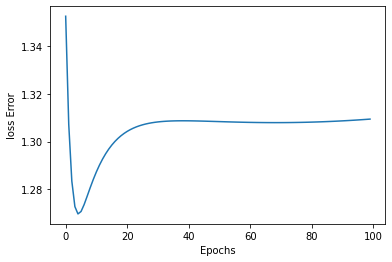

In [ ]:
w2=np.random.random((2,4))
w1=np.random.random((2,2))
obj=vec_multi_class(w1,w2)
loss=obj.fit(X_train,y_OH_train,100,2,True)
h=obj.feed_forward(X_train)



In [ ]:
y_pred=obj.predict(X_val)
y_pred_train=obj.predict(X_train)
print(accuracy_score(np.argmax(y_pred,axis=1),Y_val),accuracy_score(np.argmax(y_pred_train,axis=1),Y_train))

0.5 0.5093333333333333


#Binary_Classification!

In [ ]:
data2,labels2=make_blobs(n_samples=1000,n_features=2,centers=2,random_state=2)
print(data2.shape,labels2.shape)

(1000, 2) (1000,)


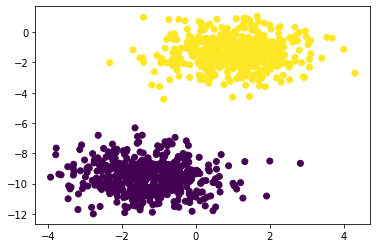

In [ ]:
plt.scatter(data2[:,0],data2[:,1],c=labels2)
plt.show()

In [ ]:
class binary_2_layer:
  def __init__(self,w1,w2,w3):
    self.w1=w1.copy()
    self.w2=w2.copy()
    self.w3=w3.copy()
    self.b1=np.zeros((1,2))
    self.b2=np.zeros((1,2))
    self.b3=np.zeros((1,1))
  
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))

  def grad_sigmoid(self,x):
    return x*(1-x)
  
  def forward_pass(self,x):

    self.A1=np.dot(x,self.w1) + self.b1       #(1000,2)*(2,2)+(1,2)-->(1000,2)
    self.H1=self.sigmoid(self.A1)             #(1000,2)
    self.A2=np.dot(self.H1,self.w2)+self.b2   #(1000,2)*(2,2)+(1,2)-->(1000,2)
    self.H2=self.sigmoid(self.A2)             #(1000,2)   

    self.A3=np.dot(self.H2,self.w3) + self.b3 #(1000,2)*(2,1)+(1,1)-->(1000,1)
    self.H3 = self.sigmoid(self.A3)           #(1000,1)   

    return self.H3

  def grad(self,x,y):
    self.forward_pass(x) 

    self.dA3 =  self.H3 - y.reshape(1000,1)                                      #(1000,1)

    self.dW3=   np.matmul((self.H2).T,self.dA3)                   #(2,1000)*(1000,1)-->(2,1)
    self.dB3=   np.sum(self.dA3,axis=0).reshape(1,-1)             #(1,1)     

    self.dH2=   np.matmul(self.dA3,(self.w3).T)                   #(1000,1)*(1,2)-->(1000,2)
    self.dA2=   np.multiply(self.dH2,self.grad_sigmoid(self.H2)) #(1000,2)*(1000,2)-->(1000,2)

    self.dW2=   np.matmul((self.H1).T,self.dA2)                   #(2,1000)*(1000,2)-->(2,2)  
    self.dB2=   np.sum(self.dA2,axis=0).reshape(1,-1)             #(1,2)

    self.dH1=  np.matmul(self.dA2,(self.w2).T)                    #(1000,2)*(2,2)-->(1000,2)          
    self.dA1=  np.multiply(self.dH1,self.grad_sigmoid(self.H1))  #(1000,2) 

    self.dW1=  np.matmul((x).T,self.dA1)                     #(2,1000)*(1000,2)-->(2,2)  
    self.dB1=  np.sum(self.dA1,axis=0).reshape(1,-1)              #(1,2)     

  def fit(self,X,Y,epochs=1,lr=1,display_loss=True):

    if display_loss:
      loss=[]

    for i in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):
      self.grad(X,Y)
      
      m=X.shape[0]
      self.w1-=lr*(self.dW1/m)
      self.w2-=lr*(self.dW2/m)
      self.w3-=lr*(self.dW3/m)
      self.b1-=lr*(self.dB1/m)
      self.b2-=lr*(self.dB2/m)
      self.b3-=lr*(self.dB3/m)

      if display_loss:
        y_pred=self.predict(X)
        loss.append(log_loss(Y,y_pred))
    
    if display_loss:
      plt.plot(loss)

  def predict(self,X):
    y_pred=self.forward_pass(X)
    return np.array(y_pred>=0.5).astype(np.int).squeeze()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


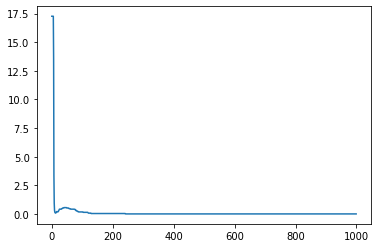

In [ ]:
w1=np.random.random((2,2))
w2=np.random.random((2,2))
w3=np.random.random((2,1))
con=binary_2_layer(w1,w2,w3)
con.fit(data2,labels2,1000,1.2,True)

In [ ]:
p=con.predict(data2)
print(log_loss(labels2,p))
print(accuracy_score(p,labels2))

9.992007221626413e-16
1.0


In [ ]:
a=[np.random.random((2,2)),np.random.random((2,1))]  

# Fully_vectorised_neural_network!

In [ ]:
class binary_2_layer:
  def __init__(self,hidden):
    self.nh=len(hidden)
    self.hidden=hidden
    self.W=[]
    self.B=[]
  
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))

  def grad_sigmoid(self,x):
    return x*(1-x)
  
  def forward_pass(self,X):#I CAN TRY RECURSION!
    self.H=[]
    self.A=[]
    self.H.append(X)
    for i in range(len(self.hidden)):
      self.A.append(np.dot(self.H[i],self.W[i])+self.B[i])    #lis
      self.H.append(self.sigmoid(self.A[i]))
    self.A.append(np.dot(self.H[-1],self.W[-1])+self.B[-1])
    self.H.append(self.sigmoid(self.A[-1]))

    return self.H
    
    
    #self.A1=np.dot(x,self.w1) + self.b1       #(1000,2)*(2,2)+(1,2)-->(1000,2)
    #self.H1=self.sigmoid(self.A1)             #(1000,2)
    #self.A2=np.dot(self.H1,self.w2)+self.b2   #(1000,2)*(2,2)+(1,2)-->(1000,2)
    #self.H2=self.sigmoid(self.A2)             #(1000,2)   

    #self.A3=np.dot(self.H2,self.w3) + self.b3 #(1000,2)*(2,1)+(1,1)-->(1000,1)
    #self.H3 = self.sigmoid(self.A3)           #(1000,1)   

    #return self.H3

  def grad(self,x,y):
    self.forward_pass(x) 
    self.dW=[]
    self.dB=[]
    self.dH=[]
    self.dA=[]

    self.dA.append(self.H[-1] - y)

                                         
    for i in range(len(self.H)-1):
      self.dW.append(np.matmul((self.H[len(self.H)-2-i]).T,self.dA[i]))
      self.dB.append(np.sum(self.dA[i],axis=0))
      
      self.dB[i]=self.dB[i].reshape(1,-1)
      
      self.dH.append(np.matmul(self.dA[i],(self.W[len(self.H)-2-i]).T))
      self.dA.append(np.multiply(self.dH[i],self.grad_sigmoid(self.dH[i])))


    #self.dW3=   np.matmul((self.H2).T,self.dA3)                   #(2,1000)*(1000,1)-->(2,1)
    #self.dB3=   np.sum(self.dA3,axis=0).reshape(1,-1)             #(1,1)     

    #self.dH2=   np.matmul(self.dA3,(self.w3).T)                   #(1000,1)*(1,2)-->(1000,2)
    #self.dA2=   np.multiply(self.dH2,self.grad_sigmoid(self.H2)) #(1000,2)*(1000,2)-->(1000,2)

    #self.dW2=   np.matmul((self.H1).T,self.dA2)                   #(2,1000)*(1000,2)-->(2,2)  
    #self.dB2=   np.sum(self.dA2,axis=0).reshape(1,-1)             #(1,2)

    #self.dH1=  np.matmul(self.dA2,(self.w2).T)                    #(1000,2)*(2,2)-->(1000,2)          
    #self.dA1=  np.multiply(self.dH1,self.grad_sigmoid(self.H1))  #(1000,2) 

    #self.dW1=  np.matmul((x).T,self.dA1)                     #(2,1000)*(1000,2)-->(2,2)  
    #self.dB1=  np.sum(self.dA1,axis=0).reshape(1,-1)              #(1,2)     

  def fit(self,X,Y,epochs=1,lr=1,display_loss=False,display_weights=False):
    if display_loss:
      loss=[]

    if display_weights:
      self.wts=[]
    if len(self.hidden)==0:
      self.W.append(np.random.random((X.shape[1],1)))
      self.B.append((np.random.random((1,1))))
    else:

      self.W.append(np.random.random((X.shape[1],self.hidden[0])))
      for i in range(len(self.hidden)-1):
        self.W.append(np.random.random((self.hidden[i],self.hidden[i+1])))
      self.W.append(np.random.random((self.hidden[self.nh-1],1)))

      for i in range(len(self.hidden)):
        self.B.append(np.random.random((1,self.hidden[i])))
      self.B.append(np.random.random((1,1)))

    for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
      self.grad(X,Y)
      m=X.shape[0]
      for i in range(len(self.W)):
        self.W[i] -= self.dW[-1-i]*lr/m
      for i in range(len(self.B)):
        self.B[i]-= self.dB[-1-i]* lr/m      
      if display_loss:
        y_pred=self.predict(X)
        loss.append(log_loss(Y,y_pred))

      if display_weights:
        self.wts.append(self.W)
    
    if display_loss:
      plt.plot(loss)
    return self.H
  def predict(self,X):
    y_pred=self.forward_pass(X)
    return (y_pred[-1]>=0.5).astype(np.int).squeeze()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


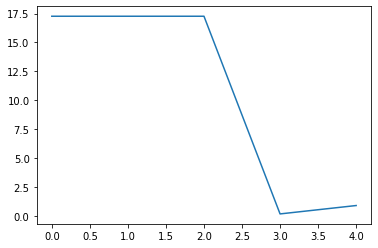

In [ ]:
hidden=[10]
ffn=binary_2_layer(hidden)
fwp =ffn.fit(data2,labels2.reshape(1000,1),5,1.1,True,True)

In [ ]:
  y_pred=ffn.predict(data2)
print(log_loss(labels2,y_pred))
print(accuracy_score(y_pred,labels2))

0.8980081862676785
0.974


#Just a representation of relative points (actual and predicted).

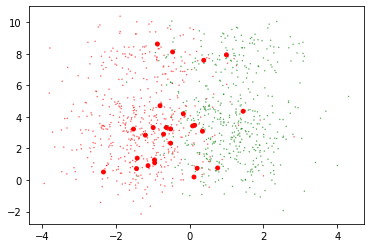

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.scatter(data2[:,0],data[:,1],c=y_pred,cmap=my_cmap,s=15*(np.abs(np.sign(labels2-y_pred)))+.1)
plt.show()